# ОИАД. Лабораторная работа №2

# Библиотеки

In [203]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Входные данные
Датасет: **datasets/students_simple.csv**
Выбираются 2 слобика данных по формулам:
1) N % 5
2) $N^2$ % 5 + 5
где $N$ - номер в списке

In [172]:
df = pd.read_csv("/Users/user/Desktop/BSU/OAID/oiad-3-2025/datasets/students_simple.csv")
display(df)

,height,mass,income,iq,pages,age,bmi,work_exp,friends,test_time
0,159,45,430,95,24,20,3.533,26,5,8.5
1,160,61,640,115,32,25,2.623,63,7,6.2
2,161,56,610,111,24,28,2.875,94,10,6.8
3,162,48,330,97,24,19,3.375,16,4,12.0
4,162,54,420,105,60,23,3.000,49,2,7.5
5,164,58,290,98,16,20,2.828,14,6,10.0
6,166,51,480,109,90,26,3.255,78,9,7.2
7,169,62,610,120,24,19,2.726,10,5,4.2
8,170,70,840,122,48,30,2.429,130,10,3.5
9,170,72,330,92,24,20,2.361,20,3,9.5


In [173]:
df.columns[2]

'income'

In [174]:
number: int = 7
num_first_column: int = number % 5
num_second_column: int = number ** 2 % 5 + 5
first_column: str = df.columns[num_first_column]
second_column: str = df.columns[num_second_column]
print(f"Первая колонка:\n    Номер: {num_first_column}\n    Название: {first_column}\nВторая колонка:\n    Номер: {num_second_column}\n    Название: {second_column}")

Первая колонка:
    Номер: 2
    Название: income
Вторая колонка:
    Номер: 9
    Название: test_time


In [178]:
my_df = df.iloc[:, [num_first_column, num_second_column]]
display(my_df)

,income,test_time
0,430,8.5
1,640,6.2
2,610,6.8
3,330,12.0
4,420,7.5
5,290,10.0
6,480,7.2
7,610,4.2
8,840,3.5
9,330,9.5


## 1. Расчет корреляций
1. Фехнера
2. Пирсона + доверительный интервал
3. Спирмена
4. Кенделла

In [185]:
def corr_fechner(df: pd.DataFrame, first_column: str, second_column: str) -> float:
    """
    Compute Fechner correlation
    """
    X: np.array = df[first_column].to_numpy()
    Y: np.array = df[second_column].to_numpy()
    mean_X: float = np.mean(X)
    mean_Y: float = np.mean(Y)
    n_samples: int = X.shape[0] ** 2
    num_pos: int = 0
    num_neg: int = 0
    for x in X:
        for y in Y:
            if (x - mean_X) * (y - mean_Y) > 0:
                num_pos += 1
            elif (x - mean_X) * (y - mean_Y) < 0:
                num_neg += 1
    return (num_pos - num_neg) / n_samples

In [186]:
print(f"Корреляция Фехнера между {first_column} и {second_column}: {corr_fechner(my_df, first_column, second_column)}")

Корреляция Фехнера между income и test_time: 0.0


In [187]:
def corr_pearson(df: pd.DataFrame, first_column: str, second_column: str) -> float:
    """
    Compute Pearson correlation
    """
    X: np.array = df[first_column].to_numpy()
    Y: np.array = df[second_column].to_numpy()
    mean_X: float = np.mean(X)
    mean_Y: float = np.mean(Y)
    corr: float = np.sum((X - mean_X) * (Y - mean_Y))
    norm_corr: float = np.sqrt(np.sum((X - mean_X) ** 2) * np.sum((Y - mean_Y) ** 2))
    return corr / norm_corr

In [188]:
print(f"Корреляция Пирсона между {first_column} и {second_column}: {corr_pearson(my_df, first_column, second_column)}")

Корреляция Пирсона между income и test_time: -0.5698939517430254


In [189]:
def confidence_interval(df: pd.DataFrame, first_column: str, second_column: str, confidence_level: float = 0.95) -> tuple[float, float]:
    """
    Computer Pearson confidence interval
    """
    corr: float = corr_pearson(df, first_column, second_column)
    num_samples: int = df[first_column].shape[0]
    z_trans: float = np.log((1 + corr) / (1 - corr)) / 2
    stand_err: float = 1 / np.sqrt(num_samples - 3)
    z_crit: float = stats.norm.ppf(1 - (1 - confidence_level) / 2)
    z_low: float = z_trans - z_crit * stand_err
    z_high: float = z_trans + z_crit * stand_err
    left_bouder: float = (np.exp(2 * z_low) - 1) / (np.exp(2 * z_low) + 1)
    right_bouder: float = (np.exp(2 * z_high) - 1) / (np.exp(2 * z_high) + 1)
    return (left_bouder, right_bouder)

In [190]:
confidence_level: float = 0.95
left_bound, right_bound = confidence_interval(my_df, first_column, second_column, confidence_level)
print(f"{confidence_level}% доверительный интервал: [{left_bound:.3f}, {right_bound:.3f}]")

0.95% доверительный интервал: [-0.809, -0.170]


In [191]:
def corr_spearman(df: pd.DataFrame, first_column: str, second_column: str) -> float:
    """
    Computer Spearman correlation
    """
    X: np.array = df[first_column].to_numpy()
    n_samples: int = X.shape[0]
    X_position: np.array = np.array([x for x in range(n_samples)])
    X_stack = np.vstack((X, X_position)).T

    Y: np.ndarray = df[second_column].to_numpy()
    Y_position: np.ndarray= np.array([x for x in range(n_samples)])
    Y_stack = np.vstack((Y, Y_position)).T

    X_stack = X_stack[X_stack[:, 0].argsort()]
    Y_stack = Y_stack[Y_stack[:, 0].argsort()]

    rank: np.array = np.array([x + 1 for x in range(n_samples)])
    X_pos_rank: np.ndarray = np.column_stack((X_stack, rank))
    Y_pos_rank: np.ndarray = np.column_stack((Y_stack, rank))

    X_pos_rank = X_pos_rank[X_pos_rank[:, 1].argsort()]
    Y_pos_rank = Y_pos_rank[Y_pos_rank[:, 1].argsort()]

    diff_rank: np.array = X_pos_rank[:, 2] - Y_pos_rank[:, 2]
    norm_coef_spearman: float = n_samples * (n_samples ** 2 - 1)

    return 1 - 6 * np.sum(diff_rank ** 2) / norm_coef_spearman

In [192]:
print(f"Корреляция Спирмена между {first_column} и {second_column}: {corr_spearman(my_df, first_column, second_column)}")

Корреляция Спирмена между income и test_time: -0.5308270676691729


In [193]:
def corr_kendall(df: pd.DataFrame, first_column: str, second_column: str) -> float:
    """
    Computer Kendall correlation
    """
    X: np.array = df[first_column].to_numpy()
    n_samples: int = X.shape[0]
    Y: np.ndarray = np.array(df[second_column])
    n_pos: int = 0
    n_neg: int = 0
    for j in range(n_samples):
        for i in range(j):
            if (X[i] - X[j]) * (Y[i] - Y[j]) > 0:
                n_pos += 1
            elif (X[i] - X[j]) * (Y[i] - Y[j]) < 0:
                n_neg += 1
    norm_coef: float = n_samples * (n_samples - 1) / 2
    return (n_pos - n_neg) / norm_coef

In [194]:
print(f"Корреляция Кенделла между {first_column} и {second_column}: {corr_kendall(my_df, first_column, second_column)}")

Корреляция Кенделла между income и test_time: -0.43157894736842106


## Выводы

1. Корреляция Фехнера = 0.0

Корреляция Фехнера просто сравнивает направление отклонений (+/−) относительно средних значений.

Значение 0.0 говорит о полном балансе положительных и отрицательных совпадений знаков — то есть, тенденция зависимости по знаку не выражена.

2. Корреляция Пирсона = −0.57 (p ≈ <0.05)

95% доверительный интервал: [−0.81; −0.17]

Отрицательная корреляция.

Чем больше доход, тем меньше время теста (то есть тест выполняется быстрее).

Интервал не включает 0, значит, связь статистически значима.

Поскольку доверительный интервал довольно широкий, есть некоторая неопределённость в точной силе связи, но направление явно отрицательное.

3. Корреляция Спирмена = −0.53

Спирмен оценивает монотонную (не обязательно линейную) зависимость.

Значение близкое к корреляции Пирсона (−0.57) подтверждает, что зависимость приблизительно монотонная.

То есть при увеличении дохода время теста, как правило, уменьшается, но не обязательно по прямой линии.

4. Корреляция Кенделла = −0.43

Это ещё один ранговый коэффициент, более «робастный» (устойчив к выбросам).

Значение −0.43 подтверждает те же тенденции, что и Спирмен, только в более сжатой шкале.

По шкале Кенделла это тоже умеренно сильная отрицательная связь.

## 2. Визуализация
1. Гистограммы
2. График рассеяния (scatter plot)

In [198]:
def print_hist_column(column: str, df: pd.DataFrame, bins: int = 20, color: str = 'skyblue') -> None:
    if column not in df.columns:
        print(f"Error: Column '{column}' not found in DataFrame.")
        return
    data = df[column]
    plt.figure(figsize=(8, 5))
    plt.hist(data, bins=bins, color=color, edgecolor='black')
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.show()

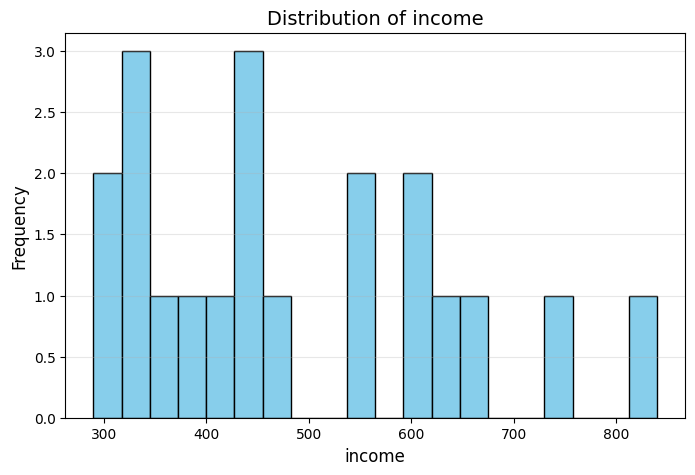

In [199]:
print_hist_column(first_column, my_df)

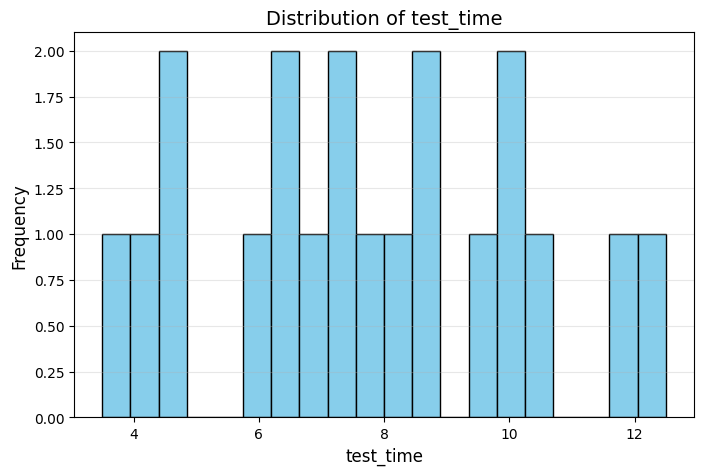

In [200]:
print_hist_column(second_column, my_df)

In [204]:
def print_scatter(df: pd.DataFrame, x_col: str, y_col: str, fig_size: tuple[int, int] = (8, 6)) -> None:
    """
    Plots a scatter plot for two numeric features from the given DataFrame.
    
    The scatter plot visualizes the relationship between two variables,
    helping to identify potential linear or nonlinear correlations and outliers.
    
    :param df: DataFrame containing numeric features
    :param x_col: Name of the column to plot on the X-axis
    :param y_col: Name of the column to plot on the Y-axis
    :param fig_size: Tuple specifying figure size in inches (default = (8, 6))
    :return: None
    """
    plt.figure(figsize=fig_size)
    sns.scatterplot(
        data=df,
        x=x_col,
        y=y_col,
        color="steelblue",
        edgecolor="white",
        s=70,
        alpha=0.7
    )
    
    plt.title(f"Scatter Plot: {x_col} vs {y_col}", fontsize=14, fontweight="bold", pad=12)
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

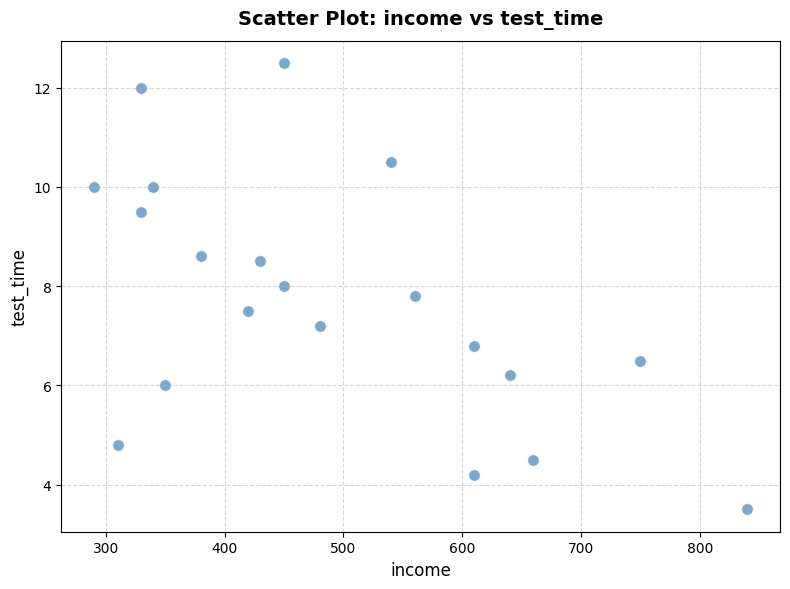

In [207]:
print_scatter(my_df, first_column, second_column)

## 3. Уравнение регрессии
Построить уравнение регрессии по видам:
1. линейная, $y=w_1 x + w_0$
2. квадратичная, $y = w_2 x^2 + w_1 x + w_0$
3. гиперболическая, $y = \frac{w_1}{x} + w_0$ 
4. показательная, $y = w_1^x \cdot w_0$

In [208]:
x: np.array = df[first_column].to_numpy()
y: np.array = df[second_column].to_numpy()

In [211]:
w1, w0 = np.polyfit(x, y, 1)
print(f"Коэффициенты линейной регрессии: w1 = {w1:.4f}, w0 = {w0:.4f}")
print(f"Уравнение: y = {w1:.4f} * x + {w0:.4f}")

Коэффициенты линейной регрессии: w1 = -0.0092, w0 = 12.2089
Уравнение: y = -0.0092 * x + 12.2089


In [212]:
w2, w1, w0 = np.polyfit(x, y, 2)
print(f"Коэффициенты квадратичной регрессии: w2 = {w2:.4f}, w1 = {w1:.4f}, w0 = {w0:.4f}")
print(f"Уравнение: y = {w2:.4f} * x ^ 2 + {w1:.4f} * x + {w0:.4f}")

Коэффициенты квадратичной регрессии: w2 = -0.0000, w1 = 0.0097, w0 = 7.6017
Уравнение: y = -0.0000 * x ^ 2 + 0.0097 * x + 7.6017


In [220]:
w1, w0 = np.polyfit(1 / x, y, 1)
print(f"Коэффициенты гиперболической регрессии: w1 = {w1:.4f}, w0 = {w0:.4f}")
print(f"Уравнение: y = {w1:.4f} / x + {w0:.4f}")

Коэффициенты гиперболической регрессии: w1 = 1832.3465, w0 = 3.6149
Уравнение: y = 1832.3465 / x + 3.6149


In [221]:
# ln(y) = ln(w0) + x * ln(w1)
mask = y > 0
x_safe = x[mask]
y_safe = y[mask]

ln_y = np.log(y_safe)

w1_log, w0_log = np.polyfit(x_safe, ln_y, 1)

w0 = np.exp(w0_log)
w1 = np.exp(w1_log)

print(f"Коэффициенты показательной регрессии: w0 = {w0:.4f}, w1 = {w1:.4f}")
print(f"Уравнение: y = {w0:.4f} * {w1:.4f}^x")

Коэффициенты показательной регрессии: w0 = 14.1216, w1 = 0.9987
Уравнение: y = 14.1216 * 0.9987^x


## Выводы

### **1. Линейная регрессия**

$y = -0.0092x + 12.2089$ 

- Отрицательный коэффициент $w_1 = -0.0092$ показывает **слабую обратную зависимость** между переменными.  
- При увеличении $x$, значение $y$ незначительно уменьшается.

---

### **2. Квадратичная регрессия**

$y = -0.0000x^2 + 0.0097x + 7.6017$

- Квадратный коэффициент $w_2 \approx 0$ указывает, что **нелинейность несущественна**.  
- Модель практически эквивалентна линейной.

---

### **3. Гиперболическая регрессия**

$y = \frac{1832.3465}{x} + 3.6149$

- Большой коэффициент $w_1 = 1832.35$ говорит, что при малых $x$ значение $y$ **резко возрастает**,  
  но затем **быстро стабилизируется** при росте $x$.

---

### **4. Показательная регрессия**

$y = 14.1216 \cdot 0.9987^x$

- Так как $w_1 = 0.9987 < 1$, функция является **затухающей**.  
- $y$ **медленно убывает** с увеличением $x$.

---

### **📈 Итог**
- Наиболее адекватными моделями являются **линейная** и **показательная**.  
- Обе отражают **слабую отрицательную зависимость** между переменными.


## 4. Проверка уравнения регрессии
Для наилучшего и наихудшего уравнения регрессии проверить соотвествие модели данным с помощью критерия Фишера

## 🔹 Алгоритм проверки уравнения регрессии (критерий Фишера)

1. **Вычислить среднее значение:**
   $ \bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i $

2. **Вычислить суммы квадратов:**
   - **Общая дисперсия:**
     $ S_t = \sum (y_i - \bar{y})^2 $
   - **Объяснённая регрессией:**
     $ S_r = \sum (\hat{y}_i - \bar{y})^2 $
   - **Остаточная (ошибки):**
     $ S_e = \sum (y_i - \hat{y}_i)^2 $

3. **Вычислить наблюдаемое значение критерия Фишера:**
   $ F = \frac{S_r / k}{S_e / (n - k - 1)} $

   где  
   $ n $ — количество наблюдений,  
   $ k $ — число коэффициентов модели (без свободного члена).

4. **Найти критическое значение:**
   $ F_{\text{кр}} = F_{1 - \alpha}(k, n - k - 1) $

   (по таблице распределения Фишера при уровне значимости $ \alpha = 0.05 $)

5. **Сделать вывод:**
   - Если $ F > F_{\text{кр}} $ → **модель значима**  
   - Если $ F \le F_{\text{кр}} $ → **модель незначима**



In [227]:
def fisher_test(x: np.ndarray, y: np.ndarray, y_pred: np.ndarray, k: int, model_name: str):
    n = len(x)
    y_mean = np.mean(y)

    S_t = np.sum((y - y_mean) ** 2)
    S_r = np.sum((y_pred - y_mean) ** 2)
    S_e = np.sum((y - y_pred) ** 2)

    F = (S_r / k) / (S_e / (n - k - 1))
    F_crit = stats.f.ppf(0.95, k, n - k - 1)

    print(f"{model_name}")
    print(f"F = {F:.3f}, F_кр = {F_crit:.3f}")
    if F > F_crit:
        print("Модель значима (хорошо описывает данные)")
    else:
        print("Модель незначима (плохое соответствие данным)")
    print("-" * 60)
    return F, F_crit

In [232]:
w1, w0 = np.polyfit(x, y, 1)
y_pred_lin = w1 * x + w0
F, F_crit = fisher_test(x, y, y_pred_lin, k=1, model_name="Линейная модель")

Линейная модель
F = 8.658, F_кр = 4.414
Модель значима (хорошо описывает данные)
------------------------------------------------------------


In [233]:
w2, w1, w0 = np.polyfit(x, y, 2)
y_pred_quad = w2 * x**2 + w1 * x + w0
F, F_crit = fisher_test(x, y, y_pred_quad, k=2, model_name="Квадратичная модель")

Квадратичная модель
F = 4.661, F_кр = 3.592
Модель значима (хорошо описывает данные)
------------------------------------------------------------


In [234]:
w1, w0 = np.polyfit(1 / x, y, 1)
y_pred_hyp = w1 / x + w0
F, F_crit = fisher_test(x, y, y_pred_hyp, k=1, model_name="Гиперболическая модель")

Гиперболическая модель
F = 5.771, F_кр = 4.414
Модель значима (хорошо описывает данные)
------------------------------------------------------------


In [235]:
ln_y = np.log(y)
b, a = np.polyfit(x, ln_y, 1)
w1, w0 = np.exp(b), np.exp(a)
y_pred_exp = w0 * (w1 ** x)
F, F_crit = fisher_test(x, y, y_pred_exp, k=1, model_name="Показательная модель")

Показательная модель
F = 8.969, F_кр = 4.414
Модель значима (хорошо описывает данные)
------------------------------------------------------------
